In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
sin_wave = np.array([math.sin(x) for x in np.arange(200)])

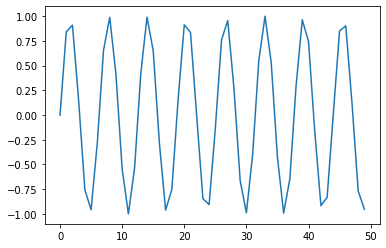

In [8]:
plt.plot(sin_wave[:50])

In [11]:
X = []
Y = []

seq_len = 50
num_records = len(sin_wave) - seq_len

for i in range(0,num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])

In [18]:
print(X[0])
Y[1]

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849 -0.54402111 -0.99999021
 -0.53657292  0.42016704  0.99060736  0.65028784 -0.28790332 -0.96139749
 -0.75098725  0.14987721  0.91294525  0.83665564 -0.00885131 -0.8462204
 -0.90557836 -0.13235175  0.76255845  0.95637593  0.27090579 -0.66363388
 -0.98803162 -0.40403765  0.55142668  0.99991186  0.52908269 -0.42818267
 -0.99177885 -0.64353813  0.29636858  0.96379539  0.74511316 -0.15862267
 -0.91652155 -0.83177474  0.01770193  0.85090352  0.90178835  0.12357312
 -0.76825466 -0.95375265]


0.6702291758433747

In [22]:
X = np.array(X)
X = np.expand_dims(X , axis=2)

In [26]:
Y = np.array(Y)
Y = np.expand_dims(Y,axis =1)

In [29]:
print(X.shape)
print(Y.shape)

(100, 50, 1)
(100, 1)


In [30]:
## Creating validation Data:

X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])
    
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)

Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)

In [31]:
learning_rate = 0.0001    
nepoch = 25               
T = 50                   # length of sequence
hidden_dim = 100         
output_dim = 1

bptt_truncate = 5
min_clip_value = -10
max_clip_value = 10

In [32]:
U = np.random.uniform(0,1,(hidden_dim , T))
V = np.random.uniform(0,1,(output_dim , hidden_dim))
W = np.random.uniform(0,1,(hidden_dim, hidden_dim))

In [37]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

(100, 1)

In [41]:
for epoch in range(nepoch):
    loss = 0.0
    for i in range(Y.shape[0]):
        x, y = X[i],Y[i]
        prev_s = np.zeros([hidden_dim,1])
        for t in range(T):
            new_input = np.zeros(X.shape)
            new_input[t] = x[t]
            mulu = np.dot(U, new_input)
            mulw = np.dot( W, prev_s)
            add = mulu + mulw
            s= sigmoid(add)
            mulv = np.dot(V,s)
            prev_s = s
        loss_per_record = (y-mulv)**2 / 2
        loss += loss_per_record
    loss = loss / float(y.shape[0])
    
    val_loss = 0.0
    for i in range(Y_val.shape[0]):
        x, y = X_val[i], Y_val[i]
        prev_s = np.zeros((hidden_dim, 1))
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s

        loss_per_record = (y - mulv)**2 / 2
        val_loss += loss_per_record
    val_loss = val_loss / float(y.shape[0])

    print('Epoch: ', epoch + 1, ', Loss: ', loss, ', Val Loss: ', val_loss)
        

Epoch:  1 , Loss:  [[[127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08767909]
  [127512.08768362]
  [127512.08768362]
  [127512.08767706]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768338]
  [127512.08768362]
  [127512.08768361]
  [127512.08768357]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768341]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.0876836 ]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768355]
  [127512.08768362]
  [127512.08768362]
  [127512.08768235]
  [127512.08768033]
 

Epoch:  5 , Loss:  [[[127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08767909]
  [127512.08768362]
  [127512.08768362]
  [127512.08767706]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768338]
  [127512.08768362]
  [127512.08768361]
  [127512.08768357]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768341]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.0876836 ]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768355]
  [127512.08768362]
  [127512.08768362]
  [127512.08768235]
  [127512.08768033]
 

Epoch:  9 , Loss:  [[[127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08767909]
  [127512.08768362]
  [127512.08768362]
  [127512.08767706]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768338]
  [127512.08768362]
  [127512.08768361]
  [127512.08768357]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768341]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.0876836 ]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768355]
  [127512.08768362]
  [127512.08768362]
  [127512.08768235]
  [127512.08768033]
 

Epoch:  13 , Loss:  [[[127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08767909]
  [127512.08768362]
  [127512.08768362]
  [127512.08767706]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768338]
  [127512.08768362]
  [127512.08768361]
  [127512.08768357]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768341]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.0876836 ]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768355]
  [127512.08768362]
  [127512.08768362]
  [127512.08768235]
  [127512.08768033]


Epoch:  17 , Loss:  [[[127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08767909]
  [127512.08768362]
  [127512.08768362]
  [127512.08767706]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768338]
  [127512.08768362]
  [127512.08768361]
  [127512.08768357]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768341]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.0876836 ]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768355]
  [127512.08768362]
  [127512.08768362]
  [127512.08768235]
  [127512.08768033]


Epoch:  21 , Loss:  [[[127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08767909]
  [127512.08768362]
  [127512.08768362]
  [127512.08767706]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768338]
  [127512.08768362]
  [127512.08768361]
  [127512.08768357]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768341]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.0876836 ]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768355]
  [127512.08768362]
  [127512.08768362]
  [127512.08768235]
  [127512.08768033]


Epoch:  25 , Loss:  [[[127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08767909]
  [127512.08768362]
  [127512.08768362]
  [127512.08767706]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768361]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768338]
  [127512.08768362]
  [127512.08768361]
  [127512.08768357]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768341]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768361]
  [127512.08768362]
  [127512.0876836 ]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768362]
  [127512.08768355]
  [127512.08768362]
  [127512.08768362]
  [127512.08768235]
  [127512.08768033]
